### So, we are given a dataset which contains details about used car.
We have to clean the data, visualise it and then apply machine learning model, testing it and then creating a web application for the car price prediction

In [1]:
# First, we will import some libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings  # We are also importing the warning library to overcome the warnings during test
warnings.filterwarnings('ignore')

In [3]:
cars=pd.read_csv(r"D:\Assignments Testbook\Assignment's python file\CAR DETAILS.csv")

In [4]:
cars

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
cars.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [7]:
cars.duplicated().sum()

763

In [8]:
cars.drop_duplicates(inplace=True)

In [9]:
cars.shape

(3577, 8)

In [10]:
cars.describe(include='object')

name    fuel seller_type transmission        owner
count                     3577    3577        3577         3577         3577
unique                    1491       5           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        54    1800        2832         3265         2218

In [11]:
pd.set_option('display.float_format', lambda x: '%.0f' % x) #To get rid of the "e" exponential notation
cars.describe()

year  selling_price  km_driven
count  3577           3577       3577
mean   2013         473913      69251
std       4         509302      47580
min    1992          20000          1
25%    2010         200000      36000
50%    2013         350000      60000
75%    2016         600000      90000
max    2020        8900000     806599

In [12]:
cars['brand']=cars['name'].apply(lambda x: ' '.join(x.split(' ')[:1]))   # In this name column there is data mix up so we are cleaning it 

In [13]:
categorical_col = [col for col in cars.columns if cars[col].dtypes == 'O']
numerical_col = [col for col in cars.columns if cars[col].dtypes != 'O']   # we are separting the categorical and numerical columns

In [14]:
print(categorical_col)
print(numerical_col)

['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand']
['year', 'selling_price', 'km_driven']


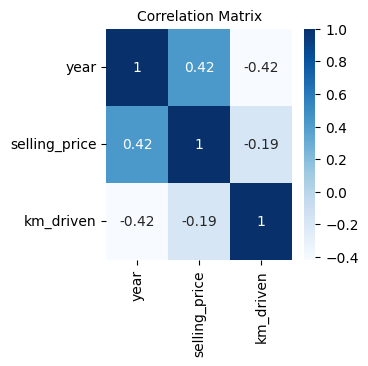

In [15]:
# we will try to see the co-relation
plt.figure(figsize=(3,3))
plt.title('Correlation Matrix', fontsize=10)
sns.heatmap(cars[numerical_col].corr(), cbar=True, annot=True, cmap='Blues')
plt.show()

In [11]:
cars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand'],
      dtype='object')

### Now , we will try different plots to get some visualisation from the data

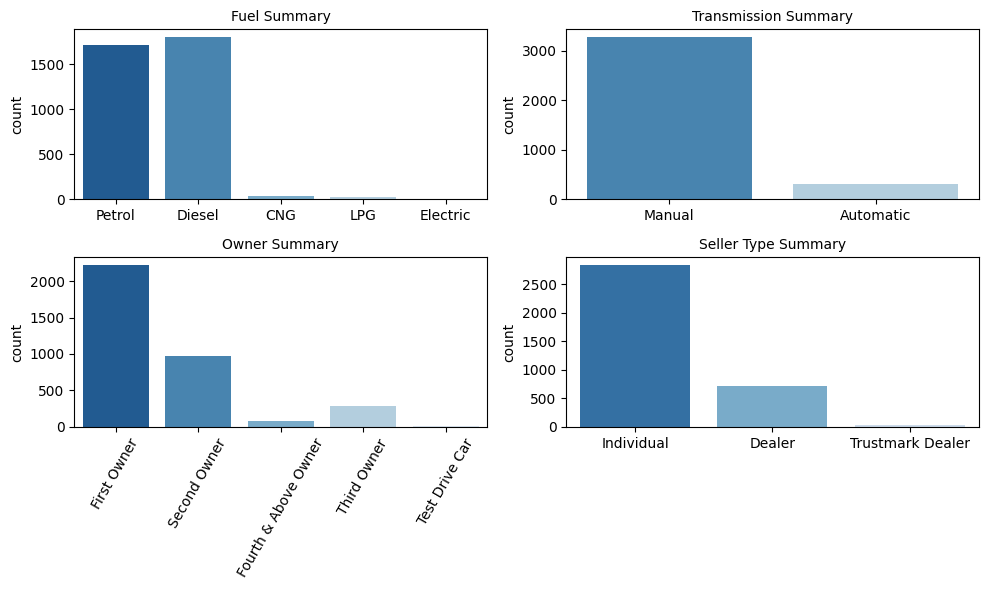

In [133]:


# Subplot of Categorical Summary
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.title('Fuel Summary', fontsize=10)
sns.countplot(data=cars, x='fuel', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,2)
plt.title('Transmission Summary', fontsize=10)
sns.countplot(data=cars, x='transmission', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,3)
plt.title('Owner Summary', fontsize=10)
sns.countplot(data=cars, x='owner', palette='Blues_r')
plt.xticks(rotation=60)
plt.xlabel('')
plt.subplot(2,2,4)
plt.title('Seller Type Summary', fontsize=10)
sns.countplot(data=cars, x='seller_type', palette='Blues_r')
plt.xlabel('')

plt.tight_layout()
plt.show()



In [19]:
x = cars['brand'].value_counts().reset_index()

In [20]:
x.head(2)

brand  count
0   Maruti   1072
1  Hyundai    637

In [21]:
a=x['brand'].iloc[:10]
b=x['count'].iloc[:10]

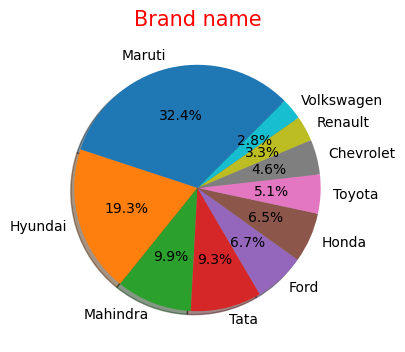

In [22]:
plt.figure(figsize = (4,4))
plt.pie(b, labels=a, rotatelabels=False, autopct='%1.1f%%',shadow=True, startangle=45,textprops={'fontsize':10})
plt.title('Brand name',color = 'red',fontsize = 15)
plt.show()   # From this , we can conclude which brand has largest role in the data and market 

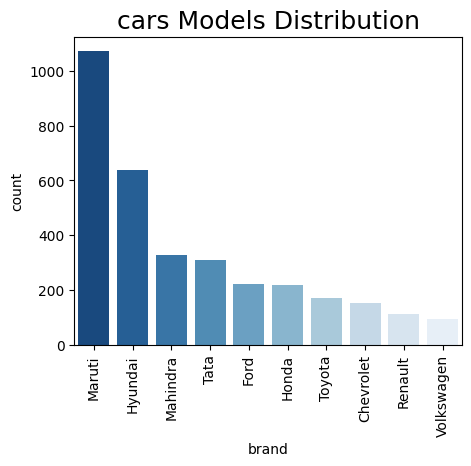

In [23]:
# Plot of cars Models Distribution
figure = plt.figure(figsize=(5,4))
plt.title('cars Models Distribution', fontsize=18)
plot = sns.countplot(x="brand", data=cars, order = cars['brand'].value_counts().index[:10], palette='Blues_r')
plt.xticks(rotation=90)
plt.show()

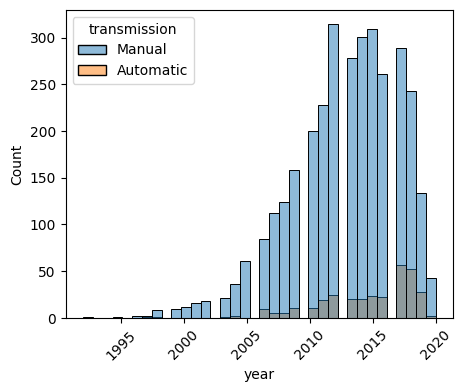

In [25]:
plt.figure(figsize=(5,4))
sns.histplot(data=cars, x="year", hue="transmission")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='year', ylabel='Count'>

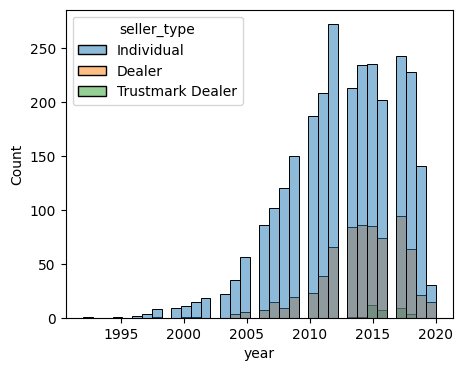

In [26]:
plt.figure(figsize=(5,4))
sns.histplot(data=cars,x='year',hue='seller_type')

In [27]:
x['year']=cars['year']

<Axes: xlabel='year', ylabel='fuel'>

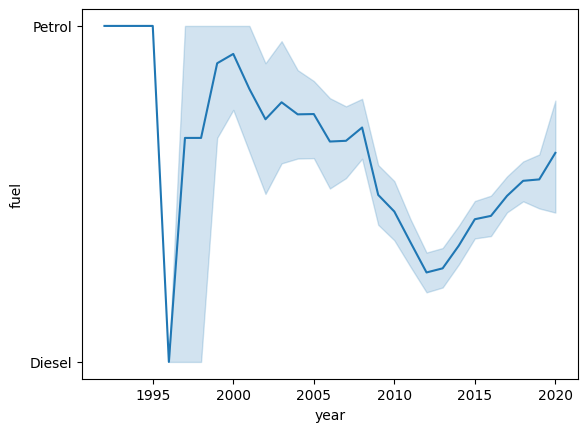

In [28]:
sns.lineplot(data=cars,x='year',y='fuel')   # Here, we are plotting fuel type over year like how people think getting increase in year

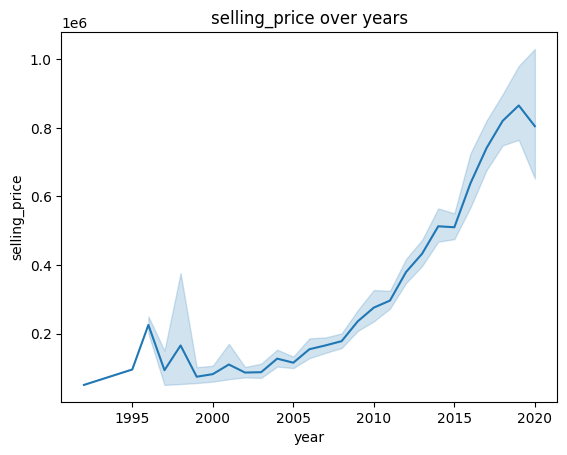

In [29]:
sns.lineplot(data=cars,x='year',y='selling_price')
plt.title('selling_price over years')
plt.show()

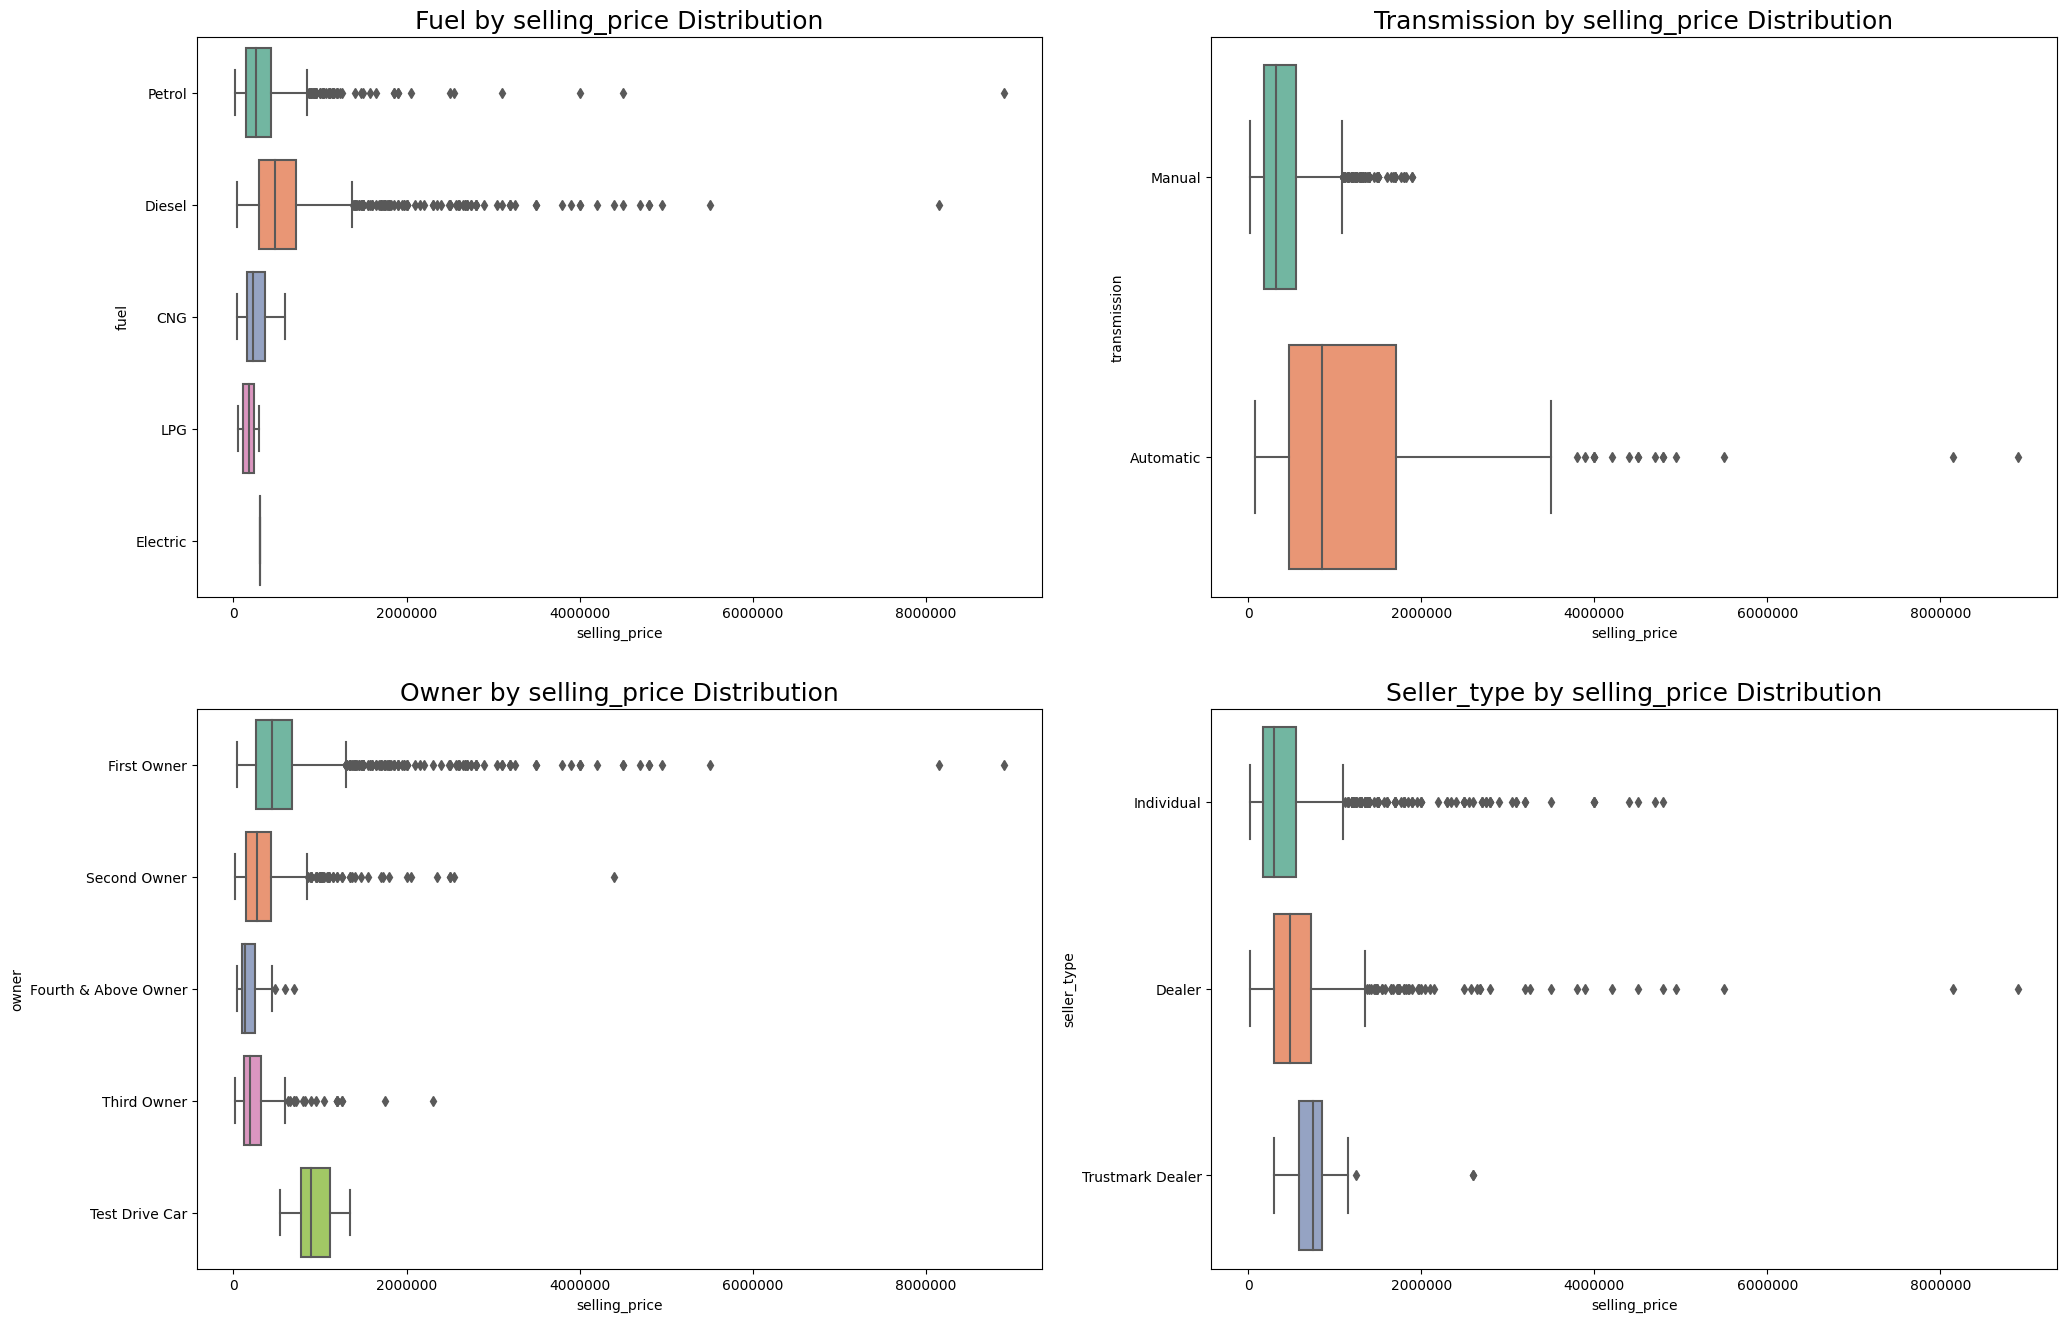

In [30]:
# We will get selling_price and other things relation


plt.figure(figsize=(24,16))

plt.subplot(2,2,1)
plt.title('Fuel by selling_price Distribution', fontsize=18)
sns.boxplot(data=cars, x='selling_price', y='fuel', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,2)
plt.title('Transmission by selling_price Distribution', fontsize=18)
sns.boxplot(data=cars, x='selling_price', y='transmission', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,3)
plt.title('Owner by selling_price Distribution', fontsize=18)
sns.boxplot(data=cars, x='selling_price', y='owner', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,4)
plt.title('Seller_type by selling_price Distribution', fontsize=18)
sns.boxplot(data=cars, x='selling_price', y='seller_type', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')

Text(0.5, 1.0, 'selling price distribution')

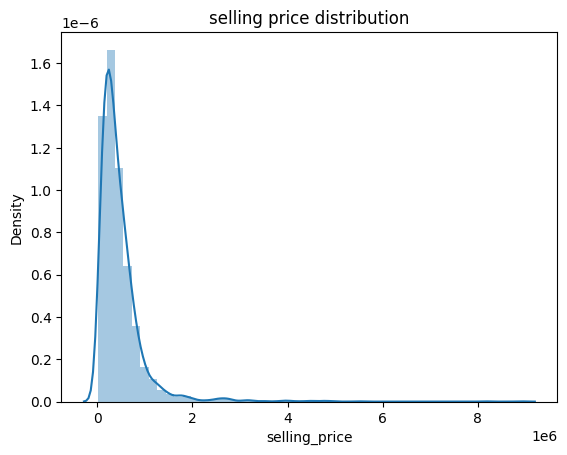

In [32]:
sns.distplot(cars['selling_price'])
plt.title('selling price distribution')

In the next three cells we are trying to get the better look of the data by pivoting it 

In [33]:
pd.pivot_table(data=cars, index=['brand'], values=['selling_price','km_driven','year']).sort_values(by='km_driven', ascending=False)


km_driven  selling_price  year
brand                                        
Mitsubishi        145574         843000  2011
Toyota            108171         838918  2013
Skoda              90271         475551  2012
Land               87600        3609800  2015
Volvo              86748        2556250  2015
OpelCorsa          86500          88500  2003
Mahindra           85086         584780  2013
Fiat               81107         287094  2012
Volkswagen         77587         461667  2013
Tata               77241         278672  2012
Chevrolet          76215         232713  2012
Ambassador         73333         200000  2006
Nissan             71593         457038  2014
Ford               66599         563627  2014
Maruti             65001         332031  2012
Audi               60140        2185452  2014
Hyundai            59323         413341  2013
Honda              57864         539944  2014
Mercedes-Benz      57559        2299238  2012
BMW                54318        2242800  2014
Renault            53019         408400  2016
Daewoo             50000          60000  2002
Jaguar             49673        2073000  2012
Isuzu              40000        1500000  2018
Force              37516         346000  2014
Datsun             29897         296552  2017
Jeep               27346        1530000  2018
MG                 16000        1842500  2019
Kia                10000        1300000  2019

In [34]:
pd.pivot_table(data=cars ,index=['brand'], values=['selling_price','km_driven','year']).sort_values(by='year', ascending=False)


km_driven  selling_price  year
brand                                        
Kia                10000        1300000  2019
MG                 16000        1842500  2019
Isuzu              40000        1500000  2018
Jeep               27346        1530000  2018
Datsun             29897         296552  2017
Renault            53019         408400  2016
Volvo              86748        2556250  2015
Land               87600        3609800  2015
Force              37516         346000  2014
Nissan             71593         457038  2014
BMW                54318        2242800  2014
Honda              57864         539944  2014
Ford               66599         563627  2014
Audi               60140        2185452  2014
Volkswagen         77587         461667  2013
Mahindra           85086         584780  2013
Hyundai            59323         413341  2013
Toyota            108171         838918  2013
Maruti             65001         332031  2012
Tata               77241         278672  2012
Jaguar             49673        2073000  2012
Fiat               81107         287094  2012
Skoda              90271         475551  2012
Chevrolet          76215         232713  2012
Mercedes-Benz      57559        2299238  2012
Mitsubishi        145574         843000  2011
Ambassador         73333         200000  2006
OpelCorsa          86500          88500  2003
Daewoo             50000          60000  2002

In [35]:
pd.pivot_table(data=cars ,index=['brand'], values=['selling_price','km_driven','year']).sort_values(by='selling_price', ascending=False)

km_driven  selling_price  year
brand                                        
Land               87600        3609800  2015
Volvo              86748        2556250  2015
Mercedes-Benz      57559        2299238  2012
BMW                54318        2242800  2014
Audi               60140        2185452  2014
Jaguar             49673        2073000  2012
MG                 16000        1842500  2019
Jeep               27346        1530000  2018
Isuzu              40000        1500000  2018
Kia                10000        1300000  2019
Mitsubishi        145574         843000  2011
Toyota            108171         838918  2013
Mahindra           85086         584780  2013
Ford               66599         563627  2014
Honda              57864         539944  2014
Skoda              90271         475551  2012
Volkswagen         77587         461667  2013
Nissan             71593         457038  2014
Hyundai            59323         413341  2013
Renault            53019         408400  2016
Force              37516         346000  2014
Maruti             65001         332031  2012
Datsun             29897         296552  2017
Fiat               81107         287094  2012
Tata               77241         278672  2012
Chevrolet          76215         232713  2012
Ambassador         73333         200000  2006
OpelCorsa          86500          88500  2003
Daewoo             50000          60000  2002

### It is the encoding step now , we have to process the data for machine learning 

We will use simple label encoding to convert the data

In [36]:
cars1=cars.copy()  # We are making a copy of data to not disturb original data

In [37]:
cars1.drop('name',axis=1,inplace=True)  # dropping unnecessary columns

In [38]:
cars1.duplicated().sum()

27

In [39]:
cars1.drop_duplicates(inplace=True)

In [40]:
categorical_col_1 = [col for col in cars1.columns if cars1[col].dtypes == 'O']
numerical_col_1 = [col for col in cars1.columns if cars1[col].dtypes != 'O']

# again categorizing columns

In [41]:
print(categorical_col_1)

['fuel', 'seller_type', 'transmission', 'owner', 'brand']


In [42]:
from sklearn.preprocessing import LabelEncoder   # we will use sklearn for this 

In [31]:
le=LabelEncoder()

In [37]:
for column in categorical_col_1:
    cars1[column] = le.fit_transform(cars1[column])

In [38]:
cars1  # so we have encoded the data 

year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0     2007          60000      70000     4            1             1      0   
1     2007         135000      50000     4            1             1      0   
2     2012         600000     100000     1            1             1      0   
3     2017         250000      46000     4            1             1      0   
4     2014         450000     141000     1            1             1      2   
...    ...            ...        ...   ...          ...           ...    ...   
4334  2012         600000     170000     1            1             1      0   
4335  2014         409999      80000     1            1             1      2   
4337  2009         110000      83000     4            1             1      2   
4338  2016         865000      90000     1            1             1      0   
4339  2016         225000      40000     4            1             1      0   

      brand  
0        18  
1        18  
2        10  
3         5  
4         9  
...     ...  
4334     26  
4335     10  
4337     18  
4338     10  
4339     23  

[3550 rows x 8 columns]

In [39]:
cars1.to_csv(r"D:\Assignments Testbook\Assignment's python file\Preprocessed_cars.csv")   # now we are saving this preprocessd data for ml 

In [40]:
cars1

year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0     2007          60000      70000     4            1             1      0   
1     2007         135000      50000     4            1             1      0   
2     2012         600000     100000     1            1             1      0   
3     2017         250000      46000     4            1             1      0   
4     2014         450000     141000     1            1             1      2   
...    ...            ...        ...   ...          ...           ...    ...   
4334  2012         600000     170000     1            1             1      0   
4335  2014         409999      80000     1            1             1      2   
4337  2009         110000      83000     4            1             1      2   
4338  2016         865000      90000     1            1             1      0   
4339  2016         225000      40000     4            1             1      0   

      brand  
0        18  
1        18  
2        10  
3         5  
4         9  
...     ...  
4334     26  
4335     10  
4337     18  
4338     10  
4339     23  

[3550 rows x 8 columns]